In [17]:
activity_files = {
    'laying': 'ac_lying -Copy1.csv',  # Adjust the path as needed
    'sitting': 'ac_sitting-Copy1.csv',
    'standing': 'ac_standing-Copy1.csv',
    'walking': 'ac_walking -Copy1.csv',
    'walking_downstairs': 'ac_walking_downstairs -Copy1.csv',
    'walking_upstairs': 'ac_walking_upstairs -Copy1.csv'
}


In [18]:
import os
print(f"Current working directory: {os.getcwd()}")


Current working directory: C:\Users\LENOVO\acti-track


In [19]:
import os

def process_activity_file(file_name, activity_label, window_size=100, overlap=50):
    if not os.path.exists(file_name):
        print(f"File not found: {file_name}. Skipping...")
        return pd.DataFrame()  # Return an empty DataFrame for missing files
    
    df = pd.read_csv(file_name)
    feature_list = []
    start = 0
    while start + window_size <= len(df):
        window = df.iloc[start:start + window_size]
        features = compute_features_for_window(window)
        features['activity'] = activity_label
        feature_list.append(features)
        start += overlap
    return pd.DataFrame(feature_list)


In [20]:
for activity, file_name in activity_files.items():
    print(f"Checking: {file_name}")
    if not os.path.exists(file_name):
        print(f"File missing: {file_name}")


Checking: ac_lying -Copy1.csv
Checking: ac_sitting-Copy1.csv
Checking: ac_standing-Copy1.csv
Checking: ac_walking -Copy1.csv
Checking: ac_walking_downstairs -Copy1.csv
Checking: ac_walking_upstairs -Copy1.csv


In [21]:
all_features = []
for activity, file_name in activity_files.items():
    print(f"Processing {activity} data...")
    features = process_activity_file(file_name, activity_label=activity, window_size=100, overlap=50)
    if not features.empty:  # Append only if DataFrame is not empty
        all_features.append(features)

if all_features:
    merged_data = pd.concat(all_features, ignore_index=True)
    merged_data.to_csv('accelerometer_features.csv', index=False)
    print("Merged dataset saved to 'accelerometer_features.csv'")
else:
    print("No data to merge. Check your file paths.")


Processing laying data...
Processing sitting data...
Processing standing data...
Processing walking data...
Processing walking_downstairs data...
Processing walking_upstairs data...
Merged dataset saved to 'accelerometer_features.csv'


In [22]:
df = pd.read_csv('accelerometer_features.csv')
df.head()

,ax_mean,ay_mean,az_mean,aT_mean,ax_std,ay_std,az_std,aT_std,ax_range,ay_range,az_range,aT_range,activity
0,-0.274729,-0.022811,0.014284,0.30686,0.060996,0.054718,0.126314,0.067213,0.4648,0.3138,0.9549,0.364,laying
1,-0.231322,-0.061755,0.093531,0.28749,0.100924,0.053292,0.074556,0.042772,0.4192,0.2701,0.3173,0.227,laying
2,-0.397028,-0.001861,0.367362,0.71094,0.524590,0.444255,0.516590,0.724175,3.8628,4.2129,2.1482,4.999,laying
3,-0.391488,-0.038424,0.249336,1.17037,0.675439,0.585840,0.892197,0.656529,4.8594,4.3656,3.8206,4.943,laying
4,0.246803,-0.252649,-0.537613,1.29862,0.661792,0.419675,1.028176,0.621193,2.8460,1.6502,3.6093,2.275,laying


In [29]:
activity_files = {
    'laying': 'gy_lying -Copy1.csv',  # Adjust the path as needed
    'sitting': 'gy_sitting -Copy1.csv',
    'standing': 'gy_standing-Copy1.csv',
    'walking': 'gy_walking-Copy1.csv',
    'walking_downstairs': 'gy_walking_downstairs -Copy1.csv',
    'walking_upstairs': 'gy_walking_upstairs -Copy1.csv'
}


In [30]:
import os

def process_activity_file(file_name, activity_label, window_size=100, overlap=50):
    if not os.path.exists(file_name):
        print(f"File not found: {file_name}. Skipping...")
        return pd.DataFrame()  # Return an empty DataFrame for missing files
    
    df = pd.read_csv(file_name)
    feature_list = []
    start = 0
    while start + window_size <= len(df):
        window = df.iloc[start:start + window_size]
        features = compute_features_for_window(window)
        features['activity'] = activity_label
        feature_list.append(features)
        start += overlap
    return pd.DataFrame(feature_list)

In [31]:
for activity, file_name in activity_files.items():
    print(f"Checking: {file_name}")
    if not os.path.exists(file_name):
        print(f"File missing: {file_name}")


Checking: gy_lying -Copy1.csv
Checking: gy_sitting -Copy1.csv
Checking: gy_standing-Copy1.csv
Checking: gy_walking-Copy1.csv
Checking: gy_walking_downstairs -Copy1.csv
Checking: gy_walking_upstairs -Copy1.csv


In [33]:
import pandas as pd
import numpy as np

# Define the file names and their corresponding labels
activity_files = {
    'laying': 'gy_lying -Copy1.csv',  # Adjust the path as needed
    'sitting': 'gy_sitting -Copy1.csv',
    'standing': 'gy_standing-Copy1.csv',
    'walking': 'gy_walking-Copy1.csv',
    'walking_downstairs': 'gy_walking_downstairs -Copy1.csv',
    'walking_upstairs': 'gy_walking_upstairs -Copy1.csv'

}

# Function to compute features for each window
def compute_features_for_window(window):
    features = {}
    # Compute mean
    features['wx_mean'] = window['wx'].mean()
    features['wy_mean'] = window['wy'].mean()
    features['wz_mean'] = window['wz'].mean()
    
    
    # Compute standard deviation
    features['wx_std'] = window['wx'].std()
    features['wy_std'] = window['wy'].std()
    features['wz_std'] = window['wz'].std()
    
    
    # Compute range (max - min)
    features['wx_range'] = window['wx'].max() - window['wx'].min()
    features['wy_range'] = window['wy'].max() - window['wy'].min()
    features['wz_range'] = window['wz'].max() - window['wz'].min()
    
    
    return features

# Function to process a single file and compute features for all windows
def process_activity_file(file_name, activity_label, window_size=100, overlap=50):
    # Read the CSV file
    df = pd.read_csv(file_name)
    
    # Prepare the list to store feature dictionaries
    feature_list = []
    
    # Iterate over the data in windows
    start = 0
    while start + window_size <= len(df):
        # Define the window
        window = df.iloc[start:start + window_size]
        
        # Compute features for the window
        features = compute_features_for_window(window)
        
        # Add the activity label
        features['activity'] = activity_label
        
        # Append to the list
        feature_list.append(features)
        
        # Move the window by overlap
        start += overlap
    
    # Convert the list of feature dictionaries to a DataFrame
    return pd.DataFrame(feature_list)

# Process all files and merge
all_features = []
for activity, file_name in activity_files.items():
    print(f"Processing {activity} data...")
    features = process_activity_file(file_name, activity_label=activity, window_size=100, overlap=50)
    all_features.append(features)

# Merge all the features into a single DataFrame
merged_data = pd.concat(all_features, ignore_index=True)

# Save the merged data to a CSV file
merged_data.to_csv('gyroscope_features.csv', index=False)
print("Merged dataset saved to 'gyroscope_features.csv'")


Processing laying data...
Processing sitting data...
Processing standing data...
Processing walking data...
Processing walking_downstairs data...
Processing walking_upstairs data...
Merged dataset saved to 'gyroscope_features.csv'


In [34]:
df1 = pd.read_csv('gyroscope_features.csv')
df1.head()

,wx_mean,wy_mean,wz_mean,wx_std,wy_std,wz_std,wx_range,wy_range,wz_range,activity
0,-0.0204,-0.0226,0.0326,0.088442,0.044622,0.152895,0.40,0.21,0.78,laying
1,-0.0034,0.0204,0.0056,0.056304,0.101304,0.111213,0.40,0.55,0.78,laying
2,-0.2210,0.2798,0.3286,0.275829,0.443455,0.393667,1.01,1.90,1.44,laying
3,-0.1804,-0.0940,0.1824,0.505225,0.732542,0.852107,1.88,2.10,3.18,laying
4,0.2776,-0.4052,-0.6448,0.489446,0.432252,0.852403,1.88,1.87,3.18,laying


In [38]:
activity_files = {
    'laying': 'mg_lying -Copy1.csv',  # Adjust the path as needed
    'sitting': 'mg_sitting-Copy1.csv',
    'standing': 'mg_standing-Copy1.csv',
    'walking': 'mg_walking-Copy1.csv',
    'walking_downstairs': 'mg_walking_downstairs -Copy1.csv',
    'walking_upstairs': 'mg_walking_upstairs-Copy1.csv'
}


In [39]:
import os

def process_activity_file(file_name, activity_label, window_size=100, overlap=50):
    if not os.path.exists(file_name):
        print(f"File not found: {file_name}. Skipping...")
        return pd.DataFrame()  # Return an empty DataFrame for missing files
    
    df = pd.read_csv(file_name)
    feature_list = []
    start = 0
    while start + window_size <= len(df):
        window = df.iloc[start:start + window_size]
        features = compute_features_for_window(window)
        features['activity'] = activity_label
        feature_list.append(features)
        start += overlap
    return pd.DataFrame(feature_list)

In [40]:
for activity, file_name in activity_files.items():
    print(f"Checking: {file_name}")
    if not os.path.exists(file_name):
        print(f"File missing: {file_name}")


Checking: mg_lying -Copy1.csv
Checking: mg_sitting-Copy1.csv
Checking: mg_standing-Copy1.csv
Checking: mg_walking-Copy1.csv
Checking: mg_walking_downstairs -Copy1.csv
Checking: mg_walking_upstairs-Copy1.csv


In [45]:
import pandas as pd
import numpy as np

# Define the file names and their corresponding labels
activity_files = {
    'laying': 'mg_lying -Copy1.csv',  # Adjust the path as needed
    'sitting': 'mg_sitting-Copy1.csv',
    'standing': 'mg_standing-Copy1.csv',
    'walking': 'mg_walking-Copy1.csv',
    'walking_downstairs': 'mg_walking_downstairs -Copy1.csv',
    'walking_upstairs': 'mg_walking_upstairs-Copy1.csv'
}

# Function to compute features for each window
def compute_features_for_window(window):
    features = {}
    # Compute mean
    features['Bx_mean'] = window['Bx'].mean()
    features['By_mean'] = window['By'].mean()
    features['Bz_mean'] = window['Bz'].mean()
    features['BT_mean'] = window['BT'].mean()
    
    # Compute standard deviation
    features['Bx_std'] = window['Bx'].std()
    features['By_std'] = window['By'].std()
    features['Bz_std'] = window['Bz'].std()
    features['BT_std'] = window['BT'].std()
    
    # Compute range (max - min)
    features['Bx_range'] = window['Bx'].max() - window['Bx'].min()
    features['By_range'] = window['By'].max() - window['By'].min()
    features['Bz_range'] = window['Bz'].max() - window['Bz'].min()
    features['BT_range'] = window['BT'].max() - window['BT'].min()
    
    return features

# Function to process a single file and compute features for all windows
def process_activity_file(file_name, activity_label, window_size=100, overlap=50):
    # Read the CSV file
    df = pd.read_csv(file_name)
    
    # Prepare the list to store feature dictionaries
    feature_list = []
    
    # Iterate over the data in windows
    start = 0
    while start + window_size <= len(df):
        # Define the window
        window = df.iloc[start:start + window_size]
        
        # Compute features for the window
        features = compute_features_for_window(window)
        
        # Add the activity label
        features['activity'] = activity_label
        
        # Append to the list
        feature_list.append(features)
        
        # Move the window by overlap
        start += overlap
    
    # Convert the list of feature dictionaries to a DataFrame
    return pd.DataFrame(feature_list)

# Process all files and merge
all_features = []
for activity, file_name in activity_files.items():
    print(f"Processing {activity} data...")
    features = process_activity_file(file_name, activity_label=activity, window_size=100, overlap=50)
    all_features.append(features)

# Merge all the features into a single DataFrame
merged_data = pd.concat(all_features, ignore_index=True)

# Save the merged data to a CSV file
merged_data.to_csv('magnetometer_features.csv', index=False)
print("Merged dataset saved to 'magnetometer_features.csv'")


Processing laying data...
Processing sitting data...
Processing standing data...
Processing walking data...
Processing walking_downstairs data...
Processing walking_upstairs data...
Merged dataset saved to 'magnetometer_features.csv'


In [46]:
import pandas as pd

# File paths of the feature files
accelerometer_file = 'accelerometer_features.csv'
gyroscope_file = 'gyroscope_features.csv'
magnetometer_file = 'magnetometer_features.csv'

# Load the feature files
accelerometer_features = pd.read_csv(accelerometer_file)
gyroscope_features = pd.read_csv(gyroscope_file)
magnetometer_features = pd.read_csv(magnetometer_file)

# Check if they have the same number of rows and aligned activities
if not (len(accelerometer_features) == len(gyroscope_features) == len(magnetometer_features)):
    print("Warning: Feature files have different row counts. Ensure alignment by time windows.")

# Ensure the activity column is the same for all
if not (accelerometer_features['activity'].equals(gyroscope_features['activity']) and 
        gyroscope_features['activity'].equals(magnetometer_features['activity'])):
    print("Warning: Activities are not aligned. Check the time windows in preprocessing.")

# Merge the features
merged_features = pd.concat(
    [accelerometer_features.drop(columns=['activity']),
     gyroscope_features.drop(columns=['activity']),
     magnetometer_features],
    axis=1
)

# Drop duplicate activity columns (keep one)
merged_features = merged_features.loc[:, ~merged_features.columns.duplicated()]

# Save the merged dataset
merged_features.to_csv('merged_features.csv', index=False)
print("Merged dataset saved to 'merged_features.csv'")


Merged dataset saved to 'merged_features.csv'


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
merged_file = 'merged_features.csv'  # Path to the merged CSV
df = pd.read_csv(merged_file)

# 1. Basic Information
print("Basic Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# 2. Shape and Column Analysis
print(f"\nDataset Shape: {df.shape}")
print("\nColumns in the dataset:")
print(df.columns)

# 3. Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ax_mean   7188 non-null   float64
 1   ay_mean   7188 non-null   float64
 2   az_mean   7188 non-null   float64
 3   aT_mean   7188 non-null   float64
 4   ax_std    7188 non-null   float64
 5   ay_std    7188 non-null   float64
 6   az_std    7188 non-null   float64
 7   aT_std    7188 non-null   float64
 8   ax_range  7188 non-null   float64
 9   ay_range  7188 non-null   float64
 10  az_range  7188 non-null   float64
 11  aT_range  7188 non-null   float64
 12  wx_mean   7188 non-null   float64
 13  wy_mean   7188 non-null   float64
 14  wz_mean   7188 non-null   float64
 15  wx_std    7188 non-null   float64
 16  wy_std    7188 non-null   float64
 17  wz_std    7188 non-null   float64
 18  wx_range  7188 non-null   float64
 19  wy_range  7188 non-null   float64
 20  wz_range  7

In [48]:
print("\nDescriptive Statistics (Numerical Data):")
print(df.describe())

print("\nDescriptive Statistics (Categorical Data):")
print(df.describe(include=['object']))


Descriptive Statistics (Numerical Data):
           ax_mean      ay_mean      az_mean      aT_mean        ax_std  \
count  7188.000000  7188.000000  7188.000000  7188.000000  7.188000e+03   
mean     -0.041405     0.087918    -0.115191     1.675473  8.593085e-01   
std       0.663364     0.520399     0.580375     2.079960  1.314163e+00   
min      -9.894836    -4.163792    -3.760036     0.032000  2.615194e-18   
25%      -0.056980    -0.011697    -0.403054     0.385410  2.710346e-02   
50%      -0.006834     0.013775    -0.121777     0.416660  1.081156e-01   
75%       0.024795     0.077298     0.031676     2.781160  1.291471e+00   
max       9.084083     6.245466     5.587784    14.999800  9.993930e+00   

            ay_std        az_std       aT_std     ax_range     ay_range  ...  \
count  7188.000000  7.188000e+03  7188.000000  7188.000000  7188.000000  ...   
mean      0.627699  1.143593e+00     0.761520     3.141134     2.273222  ...   
std       0.914360  1.726836e+00     1.131

In [49]:
print("\nCorrelation Matrix:")
correlation = df.corr()
print(correlation)




Correlation Matrix:
           ax_mean   ay_mean   az_mean   aT_mean    ax_std    ay_std  \
ax_mean   1.000000 -0.053261 -0.040650 -0.018929 -0.005167 -0.028875   
ay_mean  -0.053261  1.000000  0.043190  0.234488  0.242349  0.243935   
az_mean  -0.040650  0.043190  1.000000  0.275925  0.219201  0.259201   
aT_mean  -0.018929  0.234488  0.275925  1.000000  0.904362  0.929663   
ax_std   -0.005167  0.242349  0.219201  0.904362  1.000000  0.865453   
ay_std   -0.028875  0.243935  0.259201  0.929663  0.865453  1.000000   
az_std    0.004067  0.133816  0.285942  0.933929  0.760894  0.835068   
aT_std   -0.030456  0.216170  0.266979  0.936282  0.874185  0.892024   
ax_range -0.003159  0.220487  0.226301  0.901886  0.977608  0.877437   
ay_range -0.039757  0.197974  0.259016  0.866255  0.802356  0.949943   
az_range  0.007754  0.113800  0.252795  0.900305  0.755921  0.820128   
aT_range -0.014556  0.173028  0.235149  0.871646  0.822672  0.849223   
wx_mean  -0.004903  0.037038  0.028245  0.0

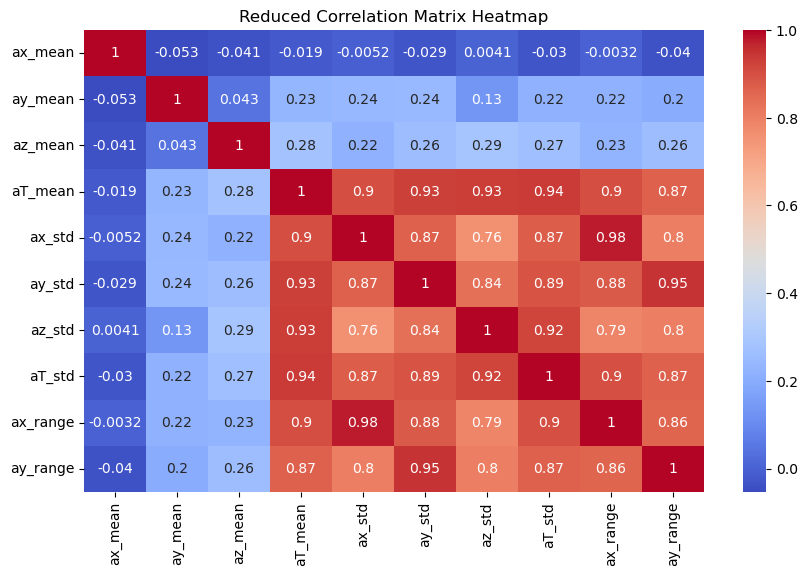

In [50]:
# Select only the first 10 numerical columns (or any subset of interest)
selected_columns = df.select_dtypes(include=['float64', 'int64']).columns[:10]
correlation = df[selected_columns].corr()

# Visualize the reduced correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Reduced Correlation Matrix Heatmap")
plt.show()


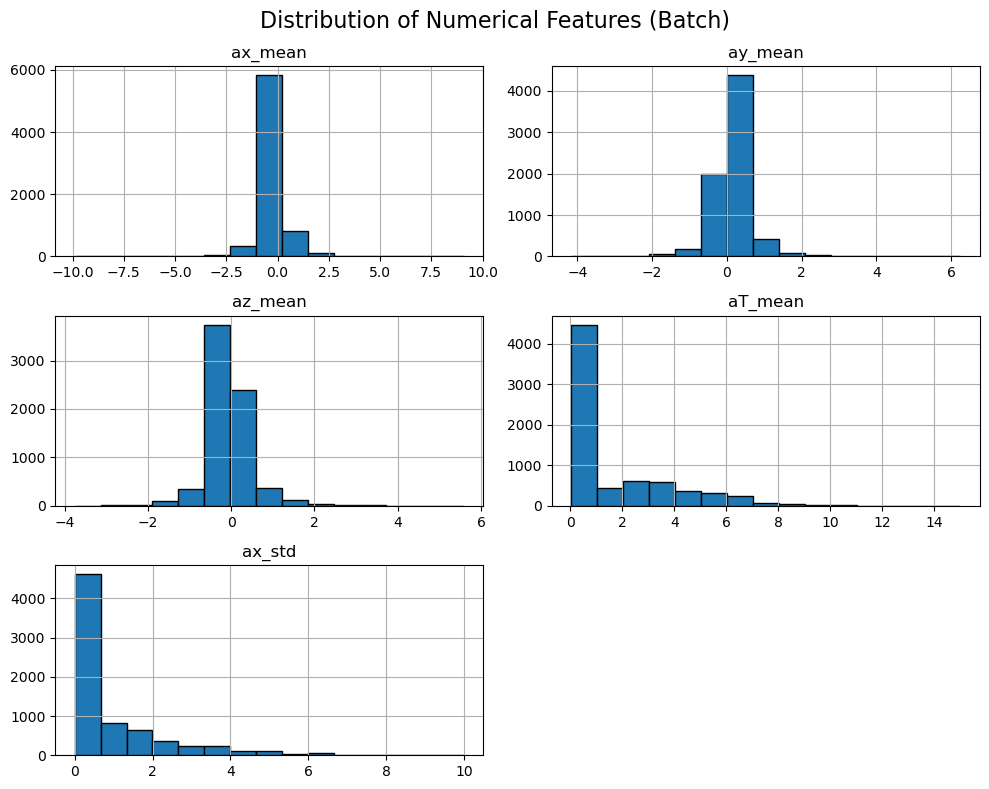

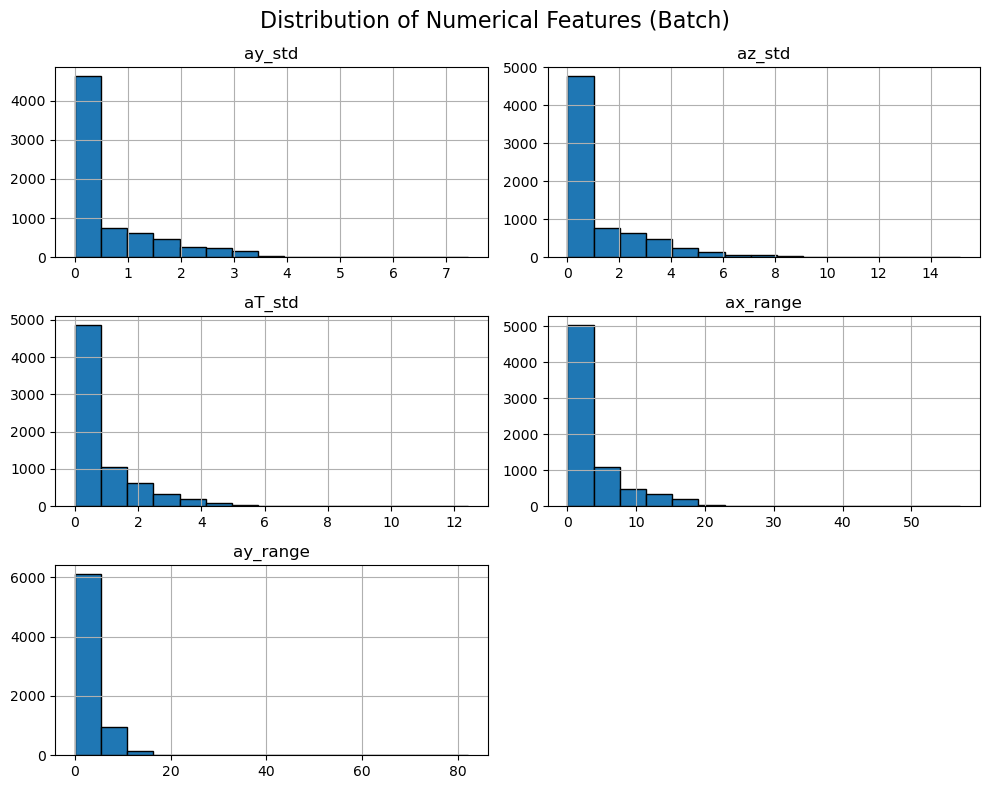

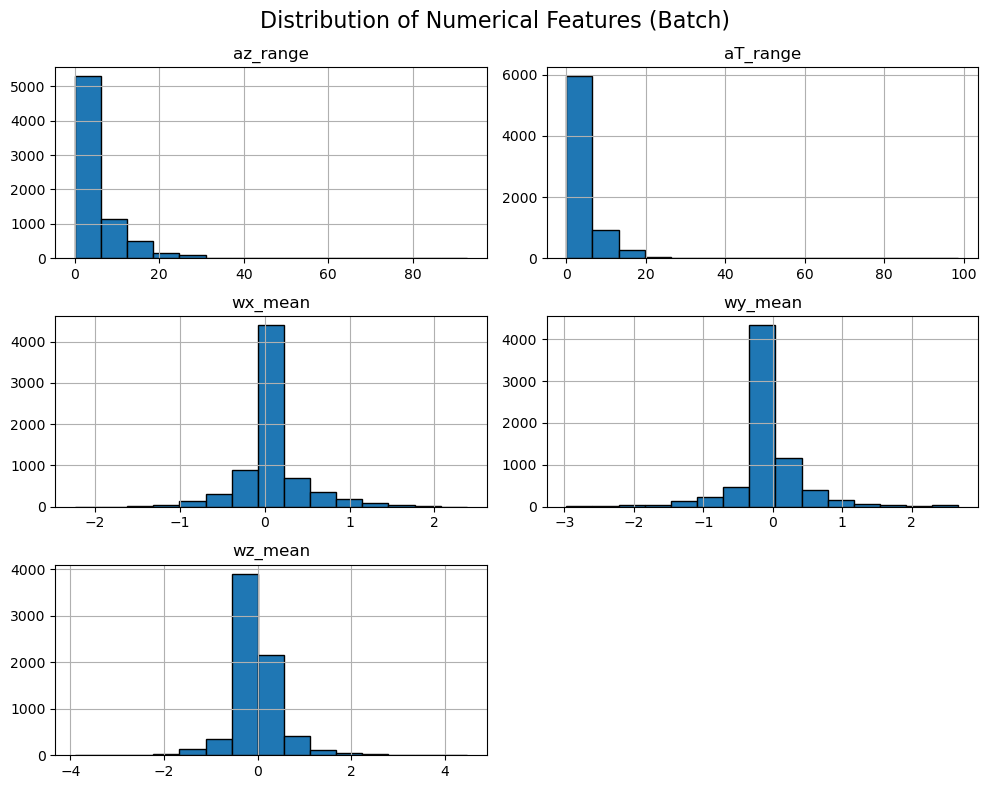

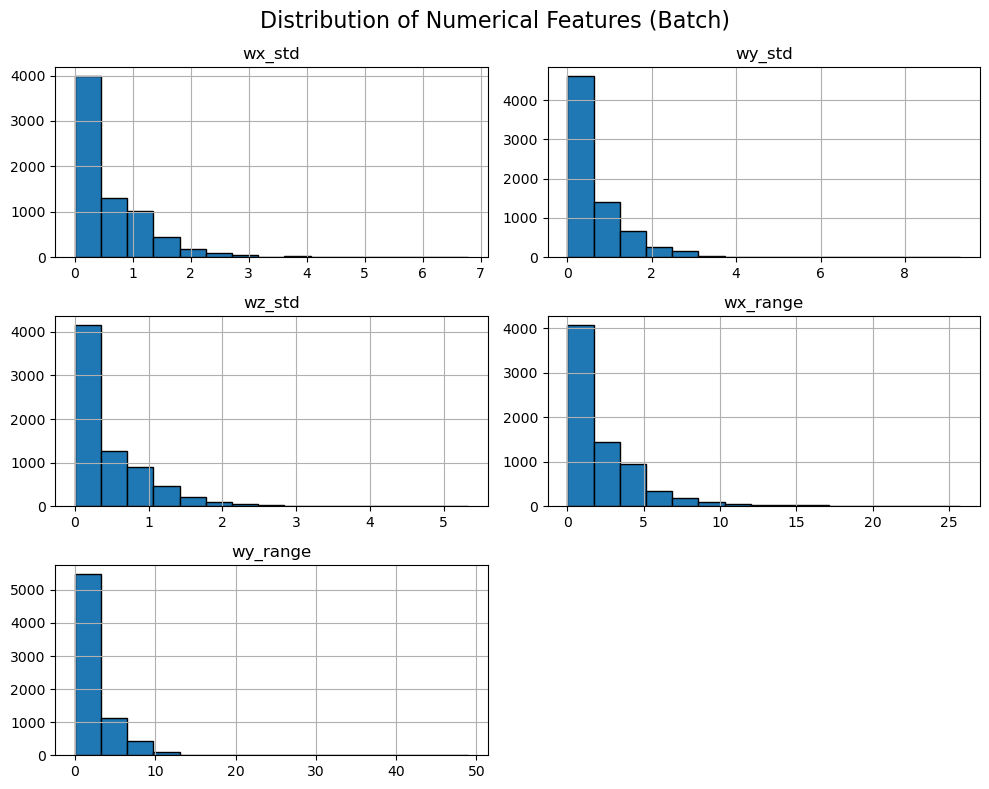

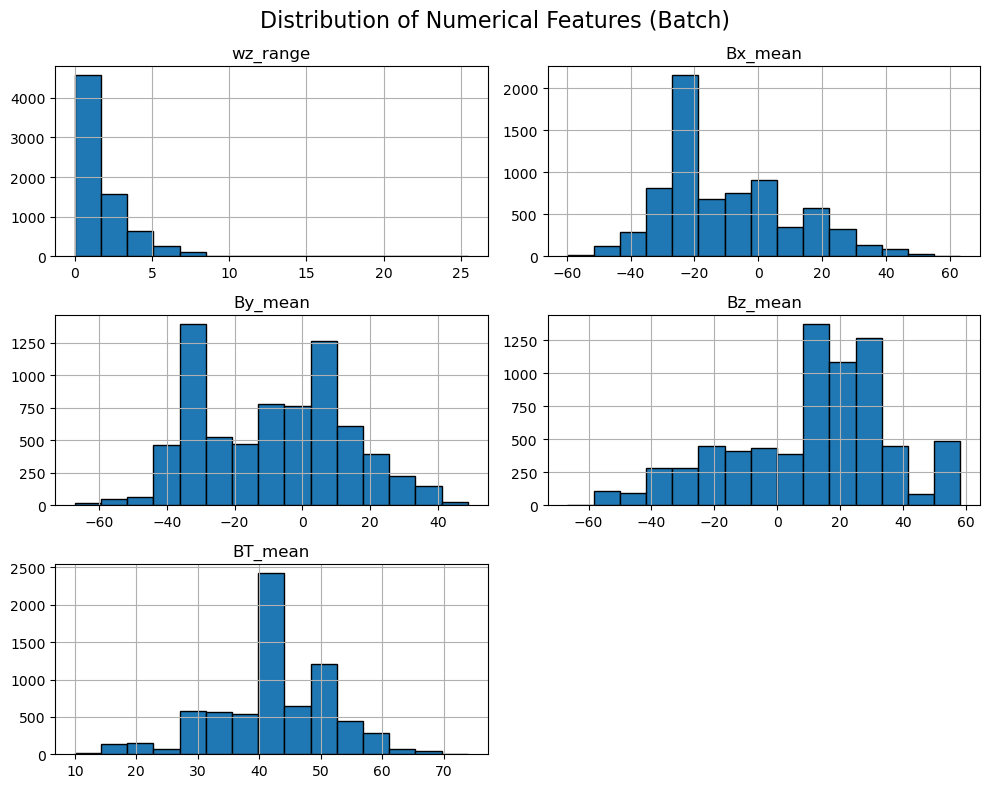

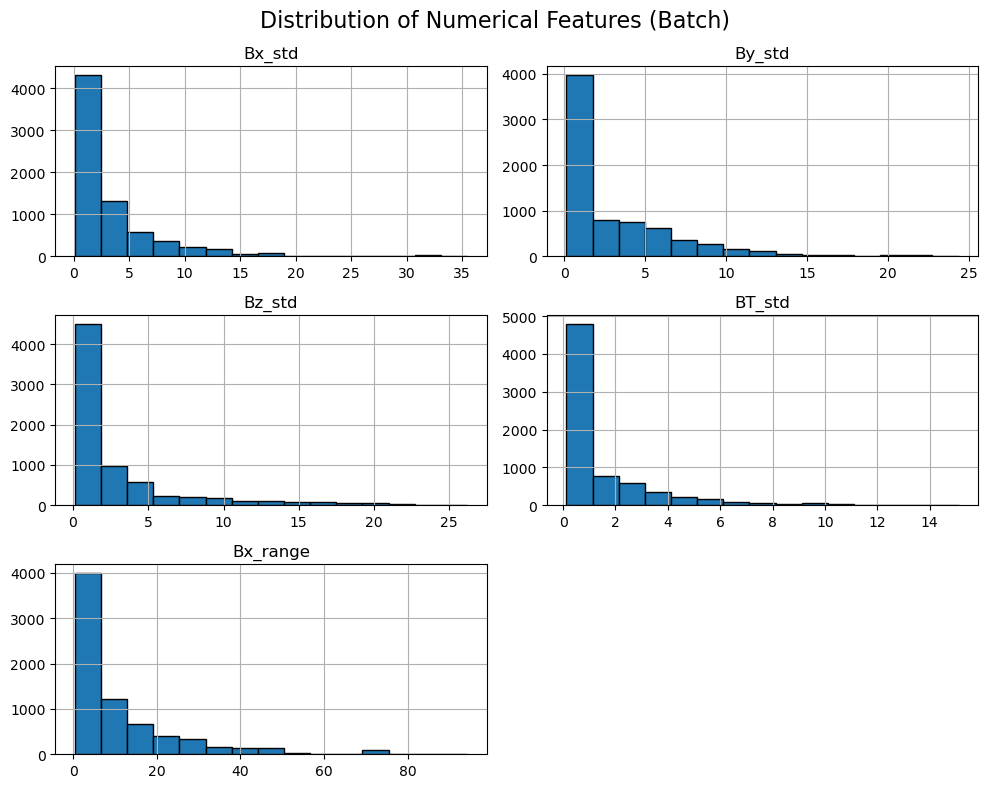

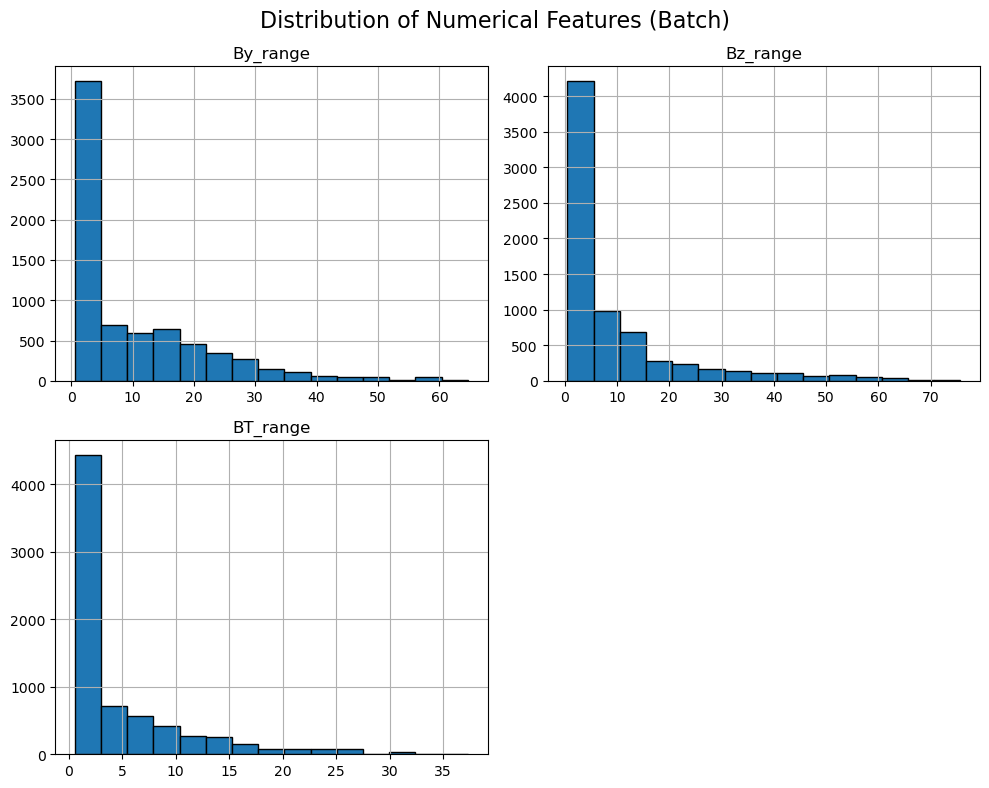

In [51]:
# Visualize histograms in batches
batch_size = 5  # Number of columns per batch
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

if len(numerical_columns) > 0:
    for i in range(0, len(numerical_columns), batch_size):
        subset_columns = numerical_columns[i:i+batch_size]
        df[subset_columns].hist(figsize=(10, 8), bins=15, edgecolor='black')
        plt.suptitle("Distribution of Numerical Features (Batch)", fontsize=16)
        plt.tight_layout()  # Adjust layout to avoid overlapping
        plt.show()
else:
    print("No numerical columns found for histogram plotting.")


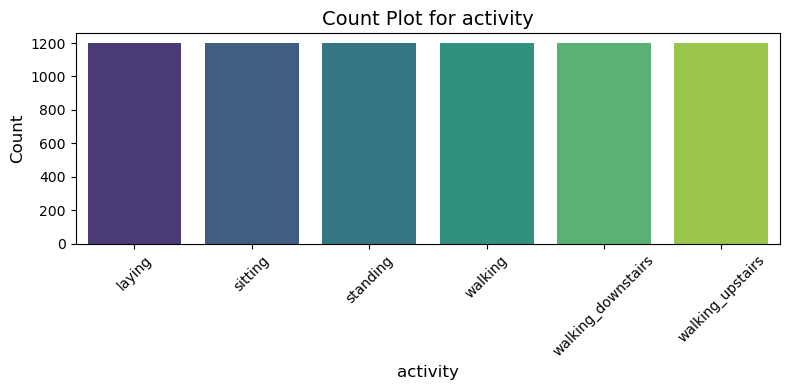

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plots for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        # Display only the top 10 categories (if too many unique values)
        value_counts = df[col].value_counts()
        if len(value_counts) > 10:
            sns.countplot(data=df, x=col, order=value_counts.index[:10], palette='viridis')
            plt.title(f"Count Plot for {col} (Top 10 Categories)", fontsize=14)
        else:
            sns.countplot(data=df, x=col, order=value_counts.index, palette='viridis')
            plt.title(f"Count Plot for {col}", fontsize=14)
        
        # Rotate x-axis labels for readability
        plt.xticks(rotation=45, fontsize=10)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found for bar plotting.")


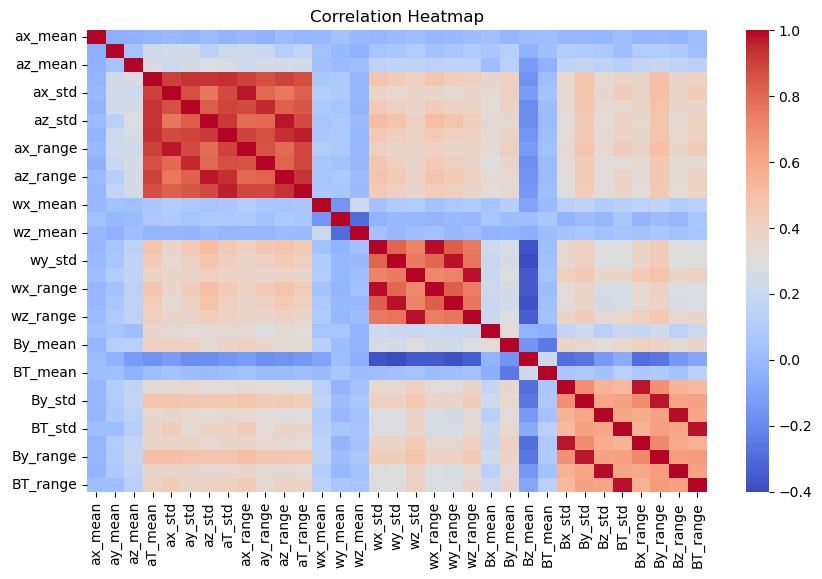

Columns dropped due to high correlation: []


In [53]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Dropping highly correlated features (threshold = 0.9)
correlation_threshold = 0.9
columns_to_drop = [
    col for col in correlation_matrix.columns
    if any(abs(correlation_matrix[col]) > correlation_threshold) and col != correlation_matrix[col].idxmax()
]
df_selected = df.drop(columns=columns_to_drop)
print(f"Columns dropped due to high correlation: {columns_to_drop}")


Dataset after encoding: (7188, 38)


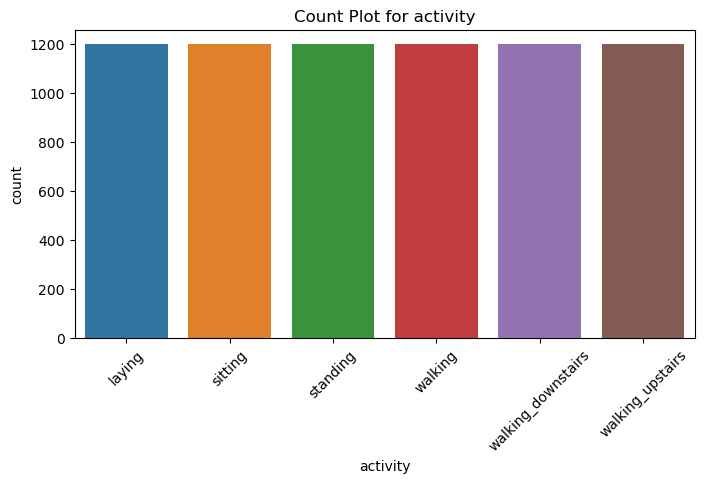

In [54]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(f"Dataset after encoding: {df_encoded.shape}")

# Example visualization
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1720\1294938380.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1720\1294938380.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


Original data shape: (7188, 33)
Reduced data shape after PCA: (7188, 17)


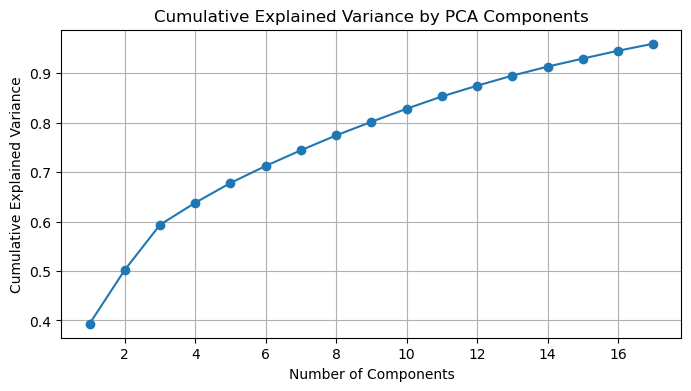

In [55]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with your sensor data

# 1. Handle missing values (NaN) by filling them with the median of each column
df.fillna(df.median(), inplace=True)

# 2. Handle infinite values (replace them with NaN and then fill them)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# 3. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# 4. Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_data = pca.fit_transform(scaled_data)

# Output original and reduced data shapes
print(f"Original data shape: {scaled_data.shape}")
print(f"Reduced data shape after PCA: {pca_data.shape}")

# 5. Plot the cumulative explained variance by PCA components
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


In [56]:
# Components contributing most to PCA
components = pd.DataFrame(
    pca.components_,
    columns=df.select_dtypes(include=['float64', 'int64']).columns
)

print("Top contributing features for each PCA component:")
print(components.head(5))  # Top 5 PCA components


Top contributing features for each PCA component:
    ax_mean   ay_mean   az_mean   aT_mean    ax_std    ay_std    az_std  \
0 -0.004307  0.052425  0.079838  0.240594  0.226459  0.232519  0.233783   
1 -0.004734  0.079537  0.038058  0.230726  0.214448  0.226955  0.206366   
2  0.008129 -0.020067 -0.005415 -0.007865 -0.071243 -0.018253  0.030329   
3 -0.120073  0.083296  0.112817  0.012209  0.003031  0.041213 -0.005518   
4  0.057870 -0.105386 -0.078743  0.013085  0.017947 -0.005287  0.045439   

     aT_std  ax_range  ay_range  ...   Bz_mean   BT_mean    Bx_std    By_std  \
0  0.238156  0.231964  0.225759  ... -0.088906  0.010507  0.168000  0.198215   
1  0.243385  0.224290  0.226877  ...  0.137213 -0.032882 -0.234935 -0.185184   
2 -0.012571 -0.057116  0.002422  ... -0.166127 -0.060317 -0.185209 -0.187758   
3  0.010633  0.007482  0.050112  ... -0.243236 -0.329643  0.075007  0.020415   
4  0.037014  0.031831  0.014117  ...  0.307284  0.594650 -0.125155 -0.009623   

     Bz_std    BT_

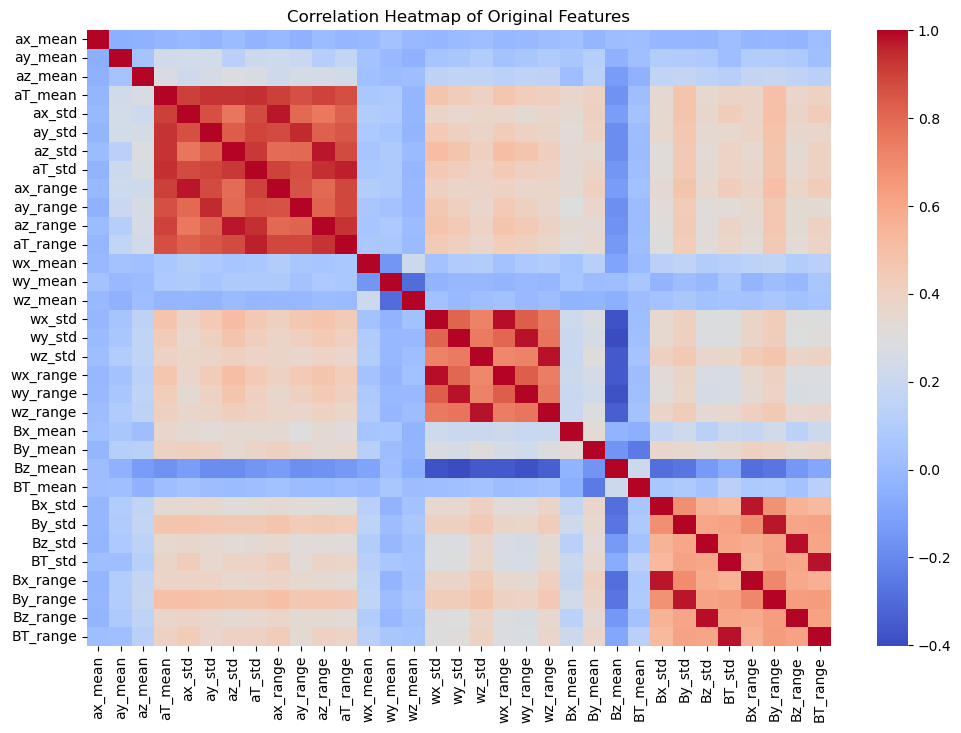

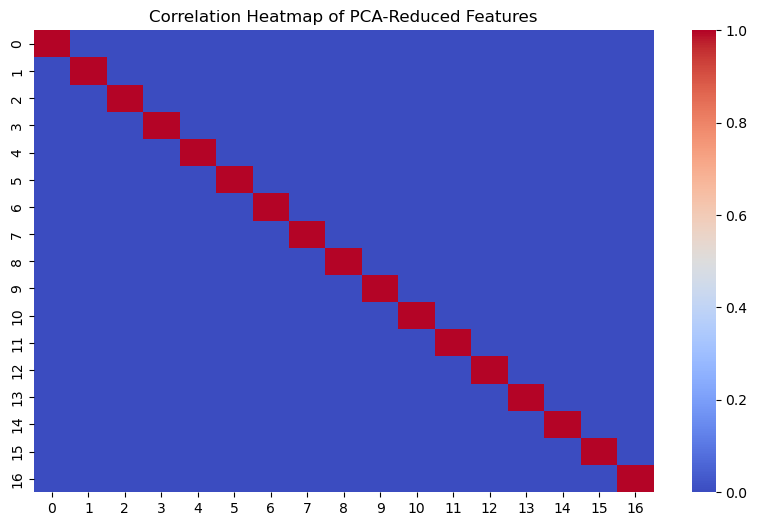

In [57]:
# Heatmap for original features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Original Features")
plt.show()

# Heatmap for PCA-reduced features
pca_corr = pd.DataFrame(pca_data).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(pca_corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of PCA-Reduced Features")
plt.show()


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your merged dataset and 'activity_label' is the column with activity labels

# Define the features (X) and labels (y)
X = df.drop('activity', axis=1)  # Drop the activity_label column to get features
y = df['activity']  # The activity_label column as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (if required by models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


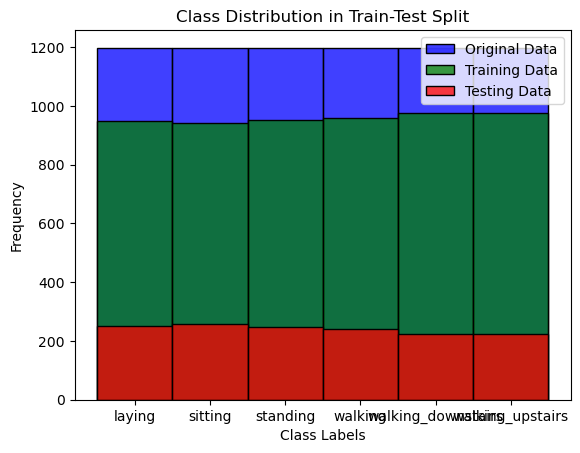

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
sns.histplot(y, kde=False, bins=3, color="blue", label="Original Data")
sns.histplot(y_train, kde=False, bins=3, color="green", label="Training Data")
sns.histplot(y_test, kde=False, bins=3, color="red", label="Testing Data")
plt.legend()
plt.title("Class Distribution in Train-Test Split")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.8880389429763561


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


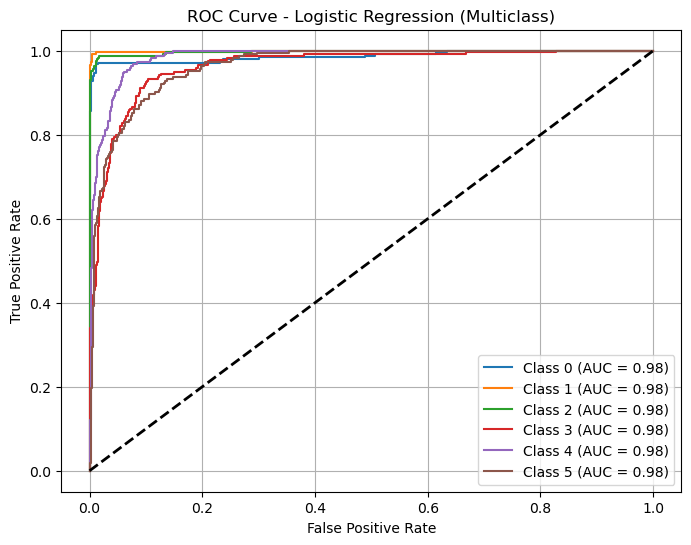

Logistic Regression: Training Loss = 0.2723, Training Accuracy = 0.9099
Testing Loss = 0.3533, Testing Accuracy = 0.8860, AUC = 0.9826


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize model for multiclass classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC-ROC for Multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Binarize labels
roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - Logistic Regression (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"Logistic Regression: Training Loss = {train_loss:.4f}, Training Accuracy = {train_accuracy:.4f}")
print(f"Testing Loss = {test_loss:.4f}, Testing Accuracy = {test_accuracy:.4f}, AUC = {roc_auc:.4f}")


In [65]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")


Decision Tree Accuracy: 0.9415855354659249


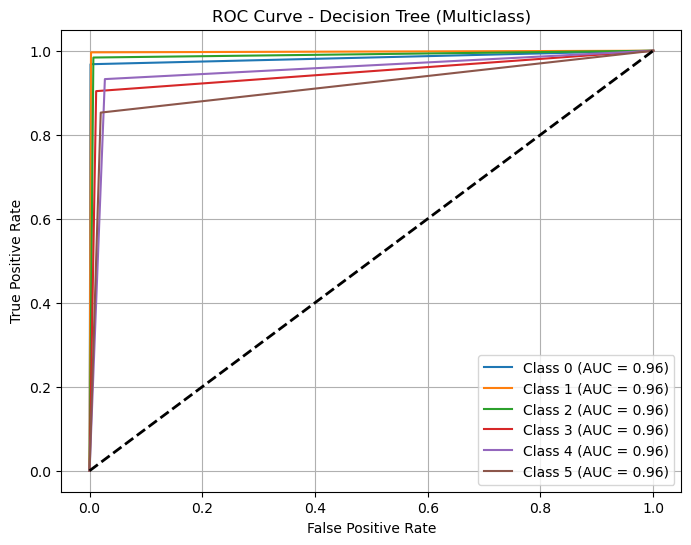

Decision Tree: Training Loss = 0.0000, Training Accuracy = 1.0000
Testing Loss = 2.0176, Testing Accuracy = 0.9416, AUC = 0.9639


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC-ROC for Multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Binarize labels
roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - Decision Tree (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"Decision Tree: Training Loss = {train_loss:.4f}, Training Accuracy = {train_accuracy:.4f}")
print(f"Testing Loss = {test_loss:.4f}, Testing Accuracy = {test_accuracy:.4f}, AUC = {roc_auc:.4f}")


In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.9707927677329624


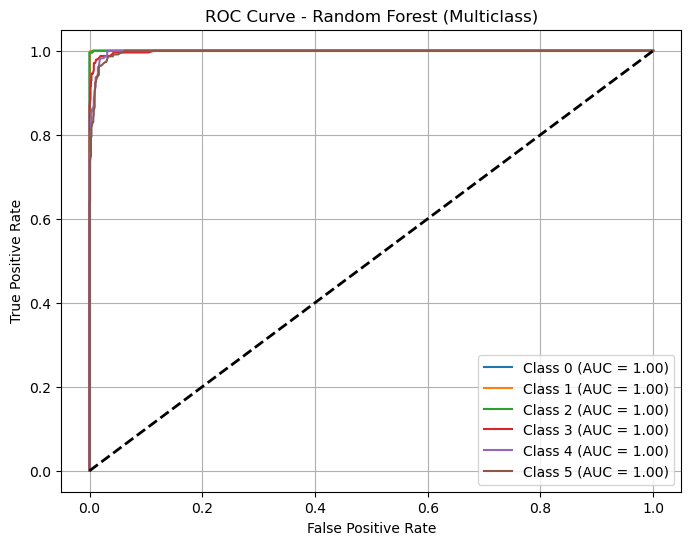

Random Forest: Training Loss = 0.0367, Training Accuracy = 1.0000
Testing Loss = 0.1247, Testing Accuracy = 0.9708, AUC = 0.9989


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC-ROC for Multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Binarize labels
roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - Random Forest (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"Random Forest: Training Loss = {train_loss:.4f}, Training Accuracy = {train_accuracy:.4f}")
print(f"Testing Loss = {test_loss:.4f}, Testing Accuracy = {test_accuracy:.4f}, AUC = {roc_auc:.4f}")


In [69]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")


SVM Accuracy: 0.9040333796940194


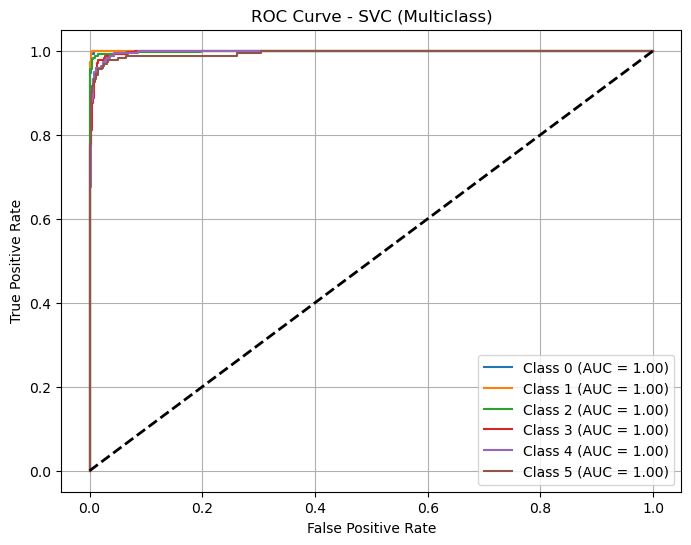

SVC: Training Loss = 0.0743, Training Accuracy = 0.9741
Testing Loss = 0.1157, Testing Accuracy = 0.9576, AUC = 0.9979


In [70]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize model
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC-ROC for Multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Binarize labels
roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - SVC (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"SVC: Training Loss = {train_loss:.4f}, Training Accuracy = {train_accuracy:.4f}")
print(f"Testing Loss = {test_loss:.4f}, Testing Accuracy = {test_accuracy:.4f}, AUC = {roc_auc:.4f}")


In [71]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"k-NN Accuracy: {accuracy}")


k-NN Accuracy: 0.9582753824756607


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

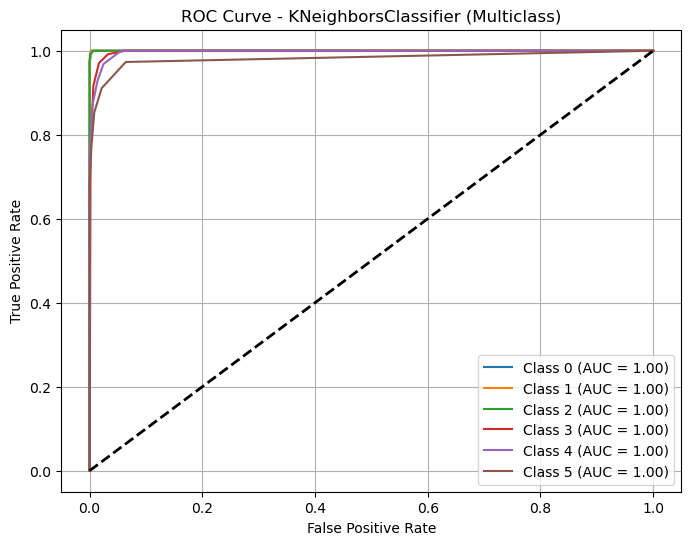

KNeighborsClassifier: Training Loss = 0.0657, Training Accuracy = 0.9737
Testing Loss = 0.2264, Testing Accuracy = 0.9583, AUC = 0.9960


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize model
model = KNeighborsClassifier(n_neighbors=5)  # Choose n_neighbors based on your preference
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC-ROC for Multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Binarize labels
roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - KNeighborsClassifier (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"KNeighborsClassifier: Training Loss = {train_loss:.4f}, Training Accuracy = {train_accuracy:.4f}")
print(f"Testing Loss = {test_loss:.4f}, Testing Accuracy = {test_accuracy:.4f}, AUC = {roc_auc:.4f}")


In [73]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy}")


Naive Bayes Accuracy: 0.8497913769123783


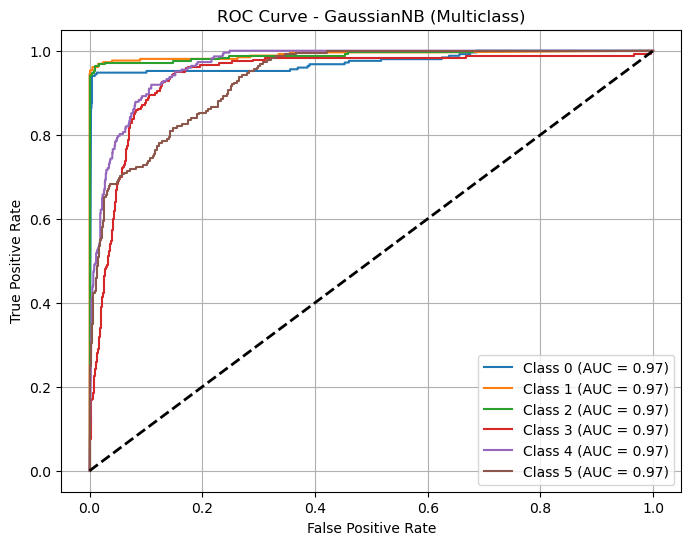

GaussianNB: Training Loss = 1.9065, Training Accuracy = 0.8402
Testing Loss = 1.9311, Testing Accuracy = 0.8498, AUC = 0.9658


In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC-ROC for Multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Binarize labels
roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - GaussianNB (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"GaussianNB: Training Loss = {train_loss:.4f}, Training Accuracy = {train_accuracy:.4f}")
print(f"Testing Loss = {test_loss:.4f}, Testing Accuracy = {test_accuracy:.4f}, AUC = {roc_auc:.4f}")


In [75]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {accuracy}")


MLP Accuracy: 0.972183588317107


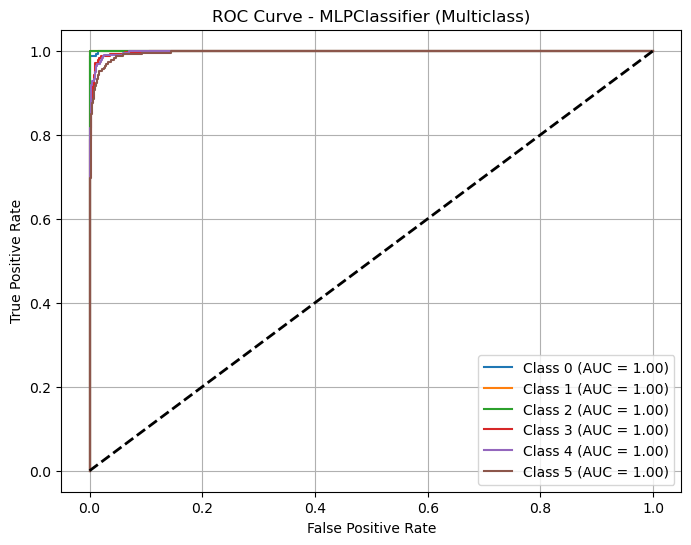

MLPClassifier: Training Loss = 0.0027, Training Accuracy = 1.0000
Testing Loss = 0.1059, Testing Accuracy = 0.9722, AUC = 0.9987


In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize model
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC-ROC for Multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Binarize labels
roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - MLPClassifier (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print metrics
print(f"MLPClassifier: Training Loss = {train_loss:.4f}, Training Accuracy = {train_accuracy:.4f}")
print(f"Testing Loss = {test_loss:.4f}, Testing Accuracy = {test_accuracy:.4f}, AUC = {roc_auc:.4f}")


Evaluating Logistic Regression...


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


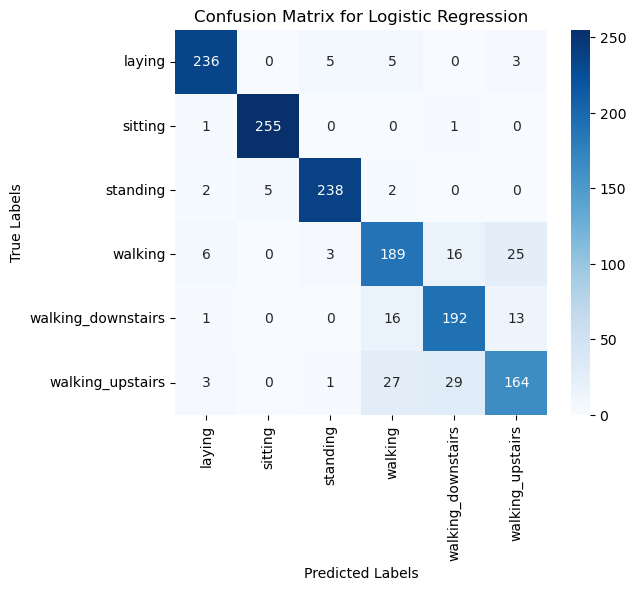

Evaluating Decision Tree...


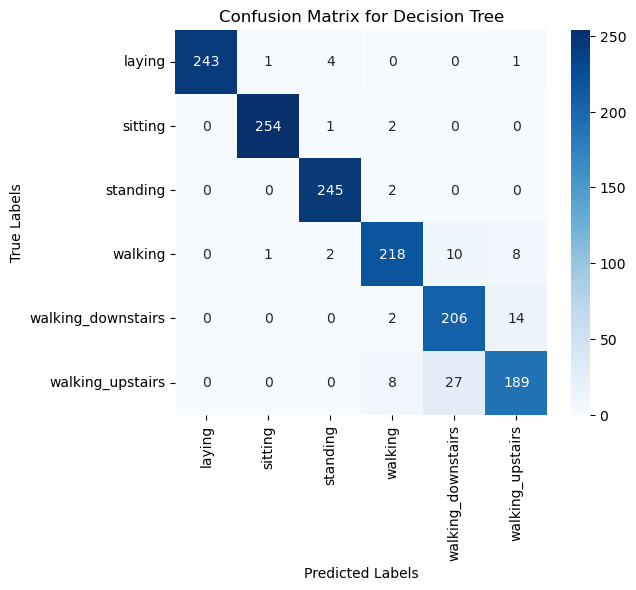

Evaluating Random Forest...


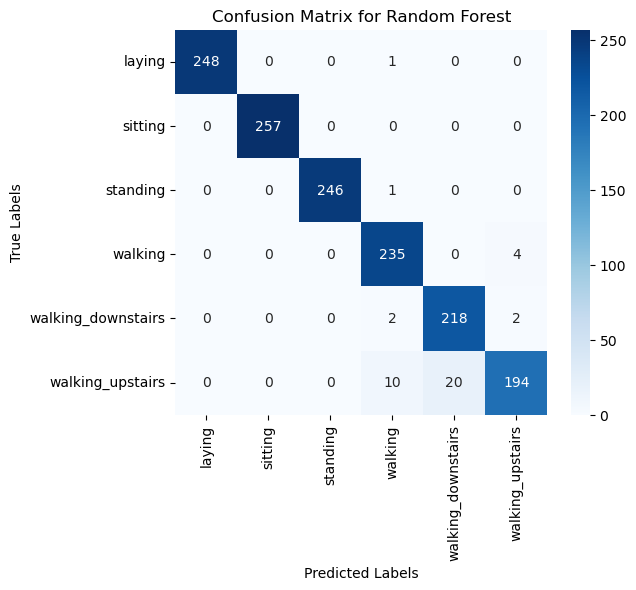

Evaluating SVC...


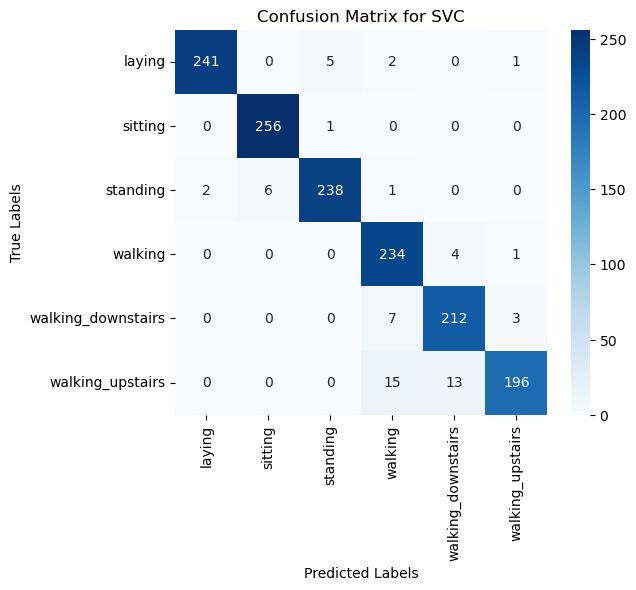

Evaluating KNeighborsClassifier...


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


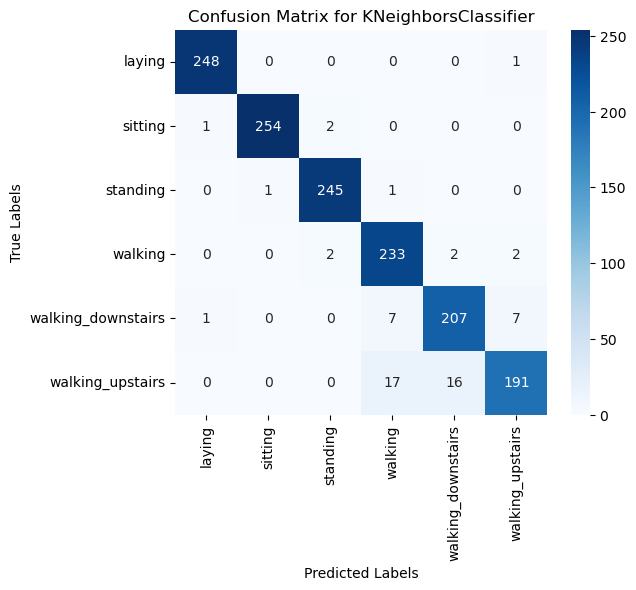

Evaluating GaussianNB...


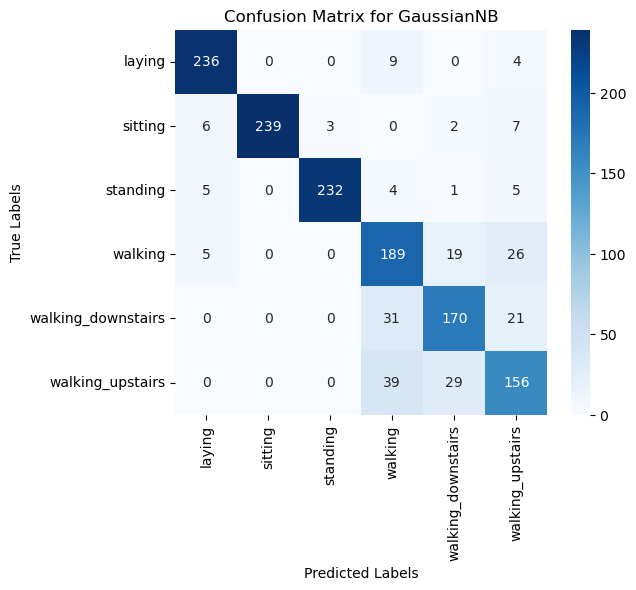

Evaluating MLPClassifier...


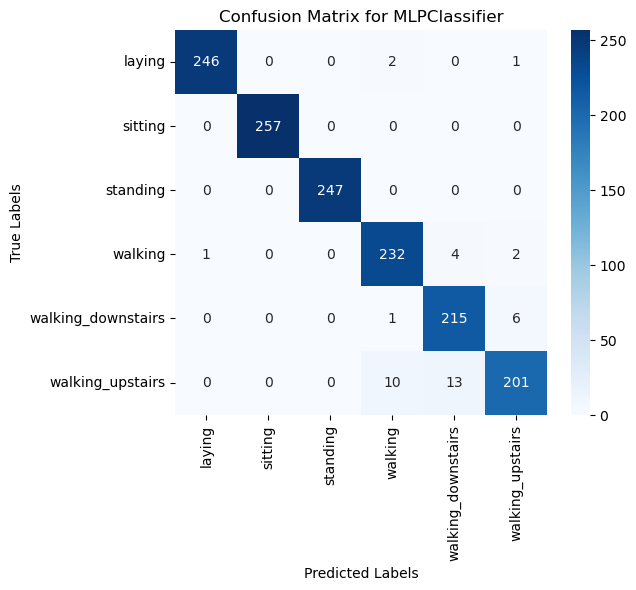

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot confusion matrix heatmap
def plot_confusion_matrix_heatmap(model_name, y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# List of models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVC": SVC(probability=True),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
}

# True labels for multiclass
labels = np.unique(y)

# Loop through models and generate confusion matrix heatmaps
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Plot heatmap
    plot_confusion_matrix_heatmap(model_name, y_test, y_pred, labels)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\s

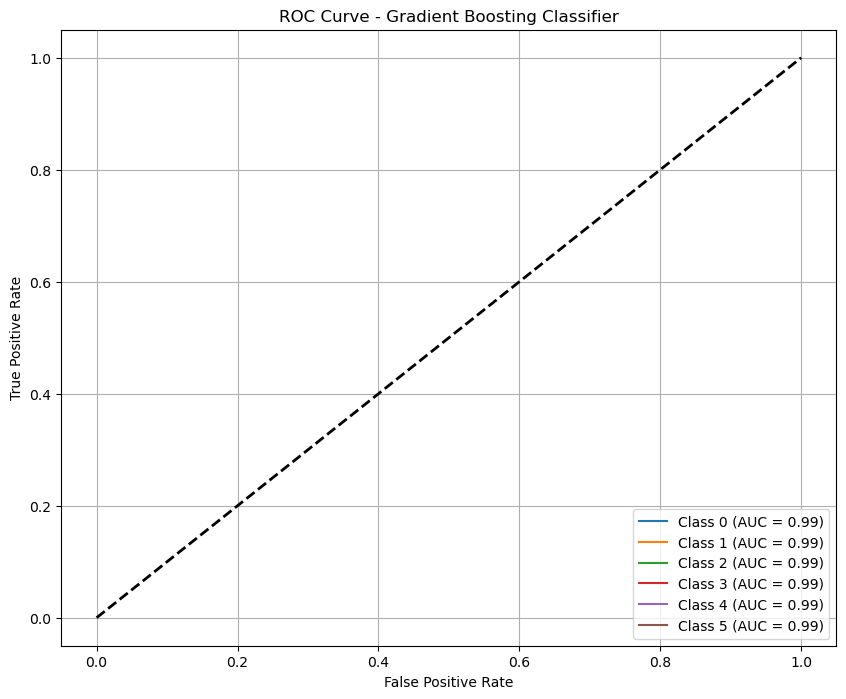

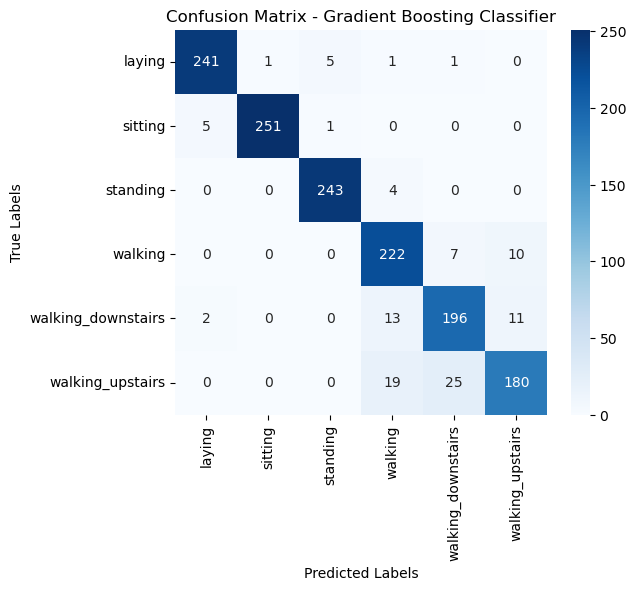

Gradient Boosting Classifier:
  Training Loss: 0.2506
  Testing Loss: 0.2784
  Training Accuracy: 0.9397
  Testing Accuracy: 0.9270
  AUC: 0.9935


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=30, max_depth=2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# ROC AUC for multi-class
roc_auc = roc_auc_score(y_test, y_test_prob, multi_class="ovr")

# ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print metrics
print(f"Gradient Boosting Classifier:")
print(f"  Training Loss: {train_loss:.4f}")
print(f"  Testing Loss: {test_loss:.4f}")
print(f"  Training Accuracy: {train_accuracy:.4f}")
print(f"  Testing Accuracy: {test_accuracy:.4f}")
print(f"  AUC: {roc_auc:.4f}")


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\s

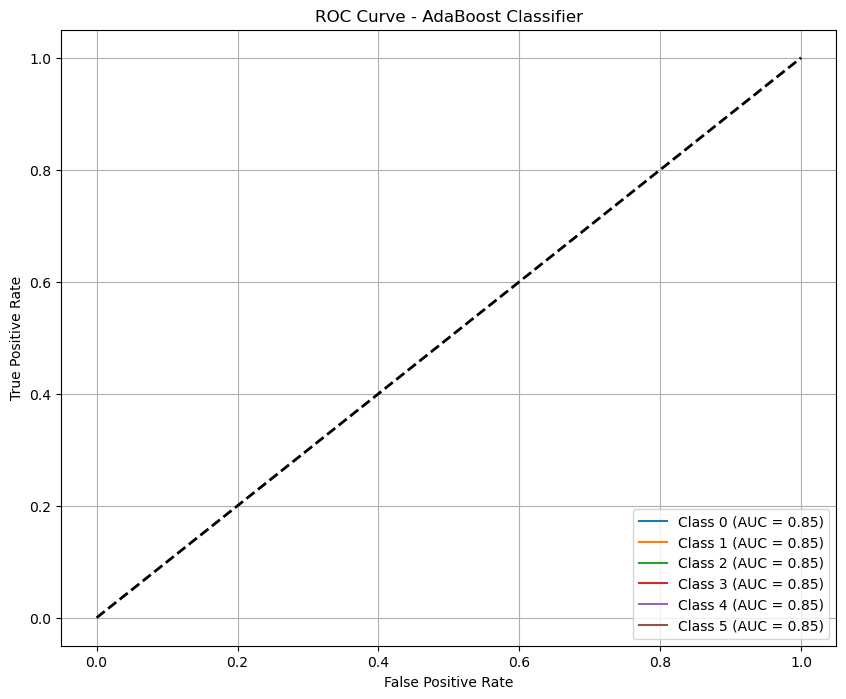

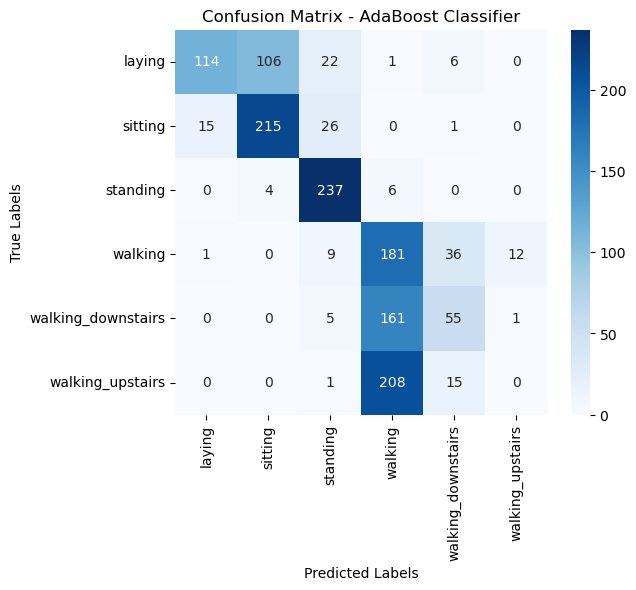

AdaBoost Classifier:
  Training Loss: 1.3671
  Testing Loss: 1.3554
  Training Accuracy: 0.5426
  Testing Accuracy: 0.5577
  AUC: 0.8507


In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# ROC AUC for multi-class
roc_auc = roc_auc_score(y_test, y_test_prob, multi_class="ovr")

# ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - AdaBoost Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print metrics
print(f"AdaBoost Classifier:")
print(f"  Training Loss: {train_loss:.4f}")
print(f"  Testing Loss: {test_loss:.4f}")
print(f"  Training Accuracy: {train_accuracy:.4f}")
print(f"  Testing Accuracy: {test_accuracy:.4f}")
print(f"  AUC: {roc_auc:.4f}")


C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:45:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


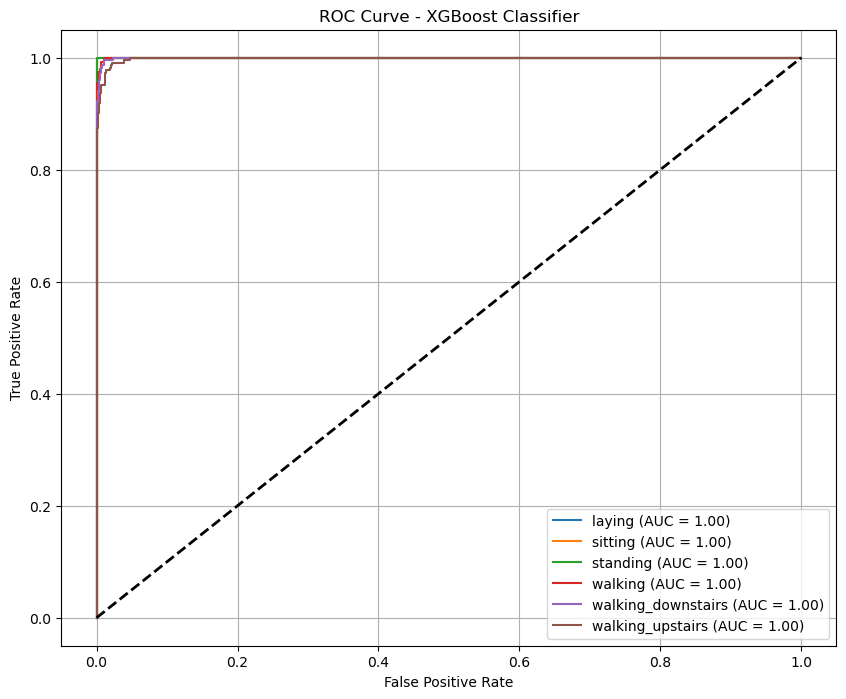

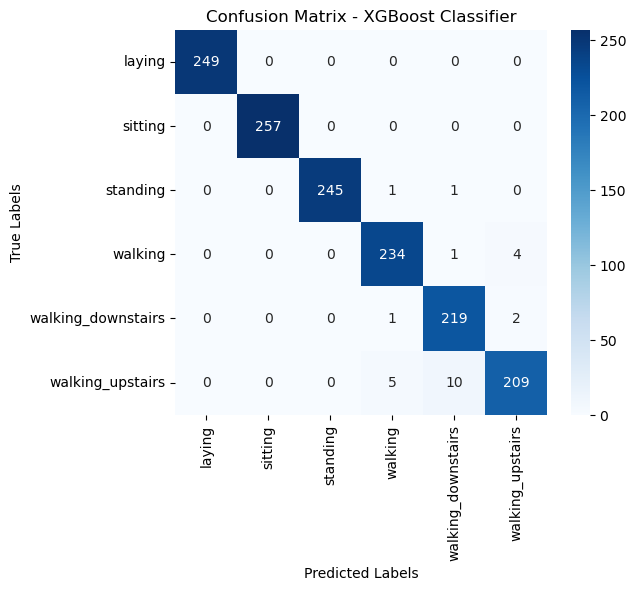

XGBoost Classifier:
  Training Loss: 0.0012
  Testing Loss: 0.0418
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9826
  AUC: 0.9997


In [81]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)        # Encode test labels

# Initialize XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

# Train the model
model.fit(X_train, y_train_encoded)

# Predictions and probabilities
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Metrics
train_loss = log_loss(y_train_encoded, y_train_prob)
test_loss = log_loss(y_test_encoded, y_test_prob)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

# ROC AUC for multi-class
roc_auc = roc_auc_score(y_test_encoded, y_test_prob, multi_class="ovr")

# ROC Curve for each class
plt.figure(figsize=(10, 8))
classes = label_encoder.classes_
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - XGBoost Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print metrics
print(f"XGBoost Classifier:")
print(f"  Training Loss: {train_loss:.4f}")
print(f"  Testing Loss: {test_loss:.4f}")
print(f"  Training Accuracy: {train_accuracy:.4f}")
print(f"  Testing Accuracy: {test_accuracy:.4f}")
print(f"  AUC: {roc_auc:.4f}")


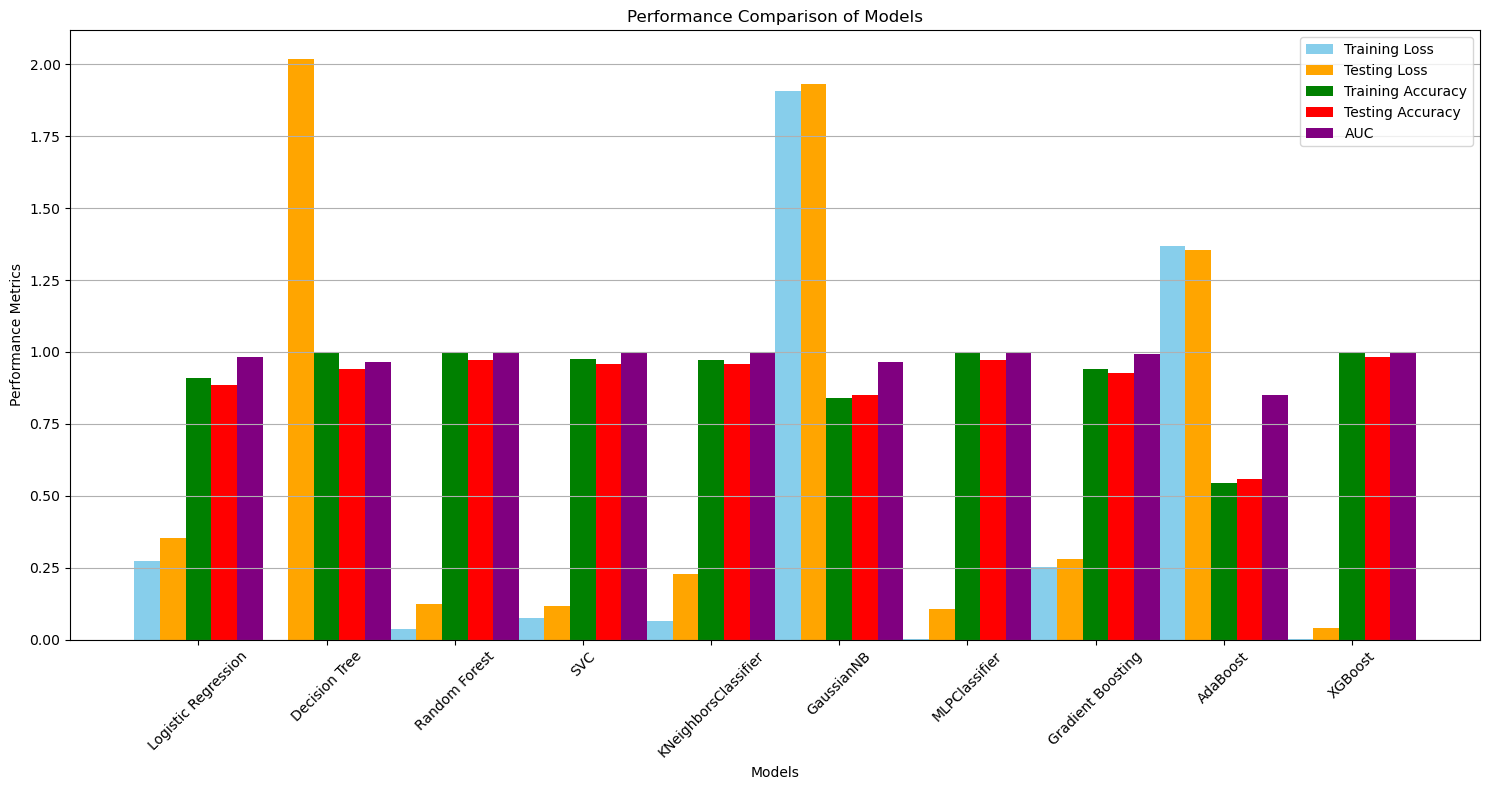

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for each model
models = [
    "Logistic Regression", "Decision Tree", "Random Forest", "SVC", "KNeighborsClassifier",
    "GaussianNB", "MLPClassifier", "Gradient Boosting", "AdaBoost", "XGBoost"
]

training_losses = [0.2723, 0.0000, 0.0367, 0.0743, 0.0657, 1.9065, 0.0027, 0.2506, 1.3671, 0.0012]
testing_losses = [0.3533, 2.0176, 0.1247, 0.1157, 0.2264, 1.9311, 0.1059, 0.2784, 1.3554, 0.0418]
training_accuracies = [0.9099, 1.0000, 1.0000, 0.9741, 0.9737, 0.8402, 1.0000, 0.9397, 0.5426, 1.0000]
testing_accuracies = [0.8860, 0.9416, 0.9708, 0.9576, 0.9583, 0.8498, 0.9722, 0.9270, 0.5577, 0.9826]
auc_scores = [0.9826, 0.9639, 0.9989, 0.9979, 0.9960, 0.9658, 0.9987, 0.9935, 0.8507, 0.9997]

# Bar Plot for Comparison
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(15, 8))

# Plot metrics
plt.bar(x - 2 * width, training_losses, width, label="Training Loss", color='skyblue')
plt.bar(x - width, testing_losses, width, label="Testing Loss", color='orange')
plt.bar(x, training_accuracies, width, label="Training Accuracy", color='green')
plt.bar(x + width, testing_accuracies, width, label="Testing Accuracy", color='red')
plt.bar(x + 2 * width, auc_scores, width, label="AUC", color='purple')

# Add labels
plt.xlabel("Models")
plt.ylabel("Performance Metrics")
plt.title("Performance Comparison of Models")
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


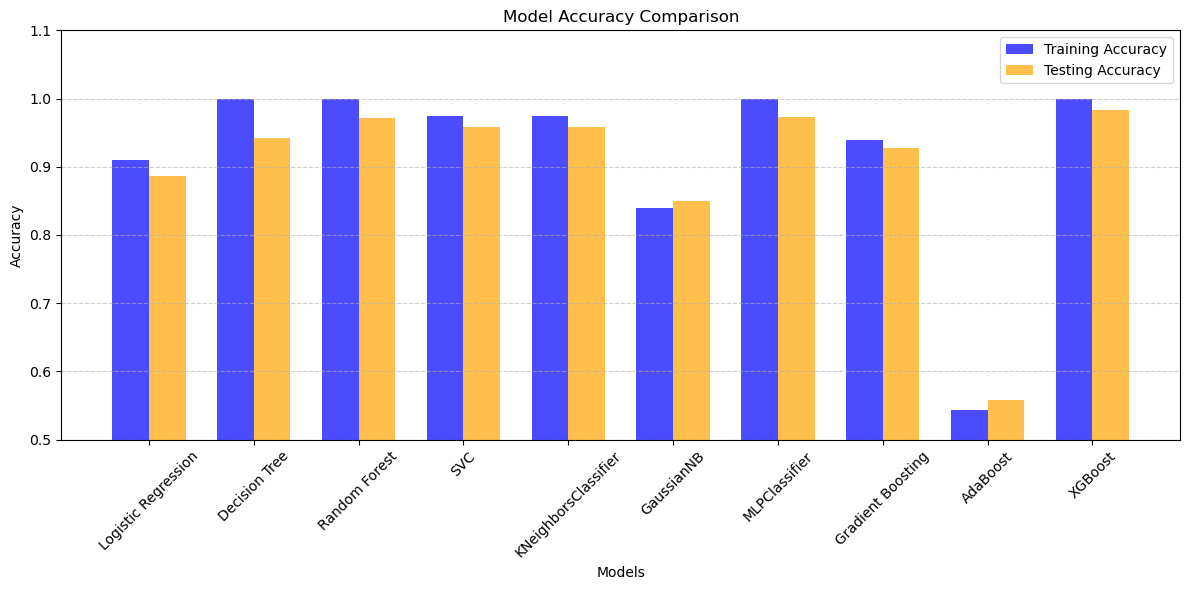

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Models and accuracies
models = [
    "Logistic Regression", "Decision Tree", "Random Forest", "SVC", "KNeighborsClassifier",
    "GaussianNB", "MLPClassifier", "Gradient Boosting", "AdaBoost", "XGBoost"
]
training_accuracies = [0.9099, 1.0000, 1.0000, 0.9741, 0.9737, 0.8402, 1.0000, 0.9397, 0.5426, 1.0000]
testing_accuracies = [0.8860, 0.9416, 0.9708, 0.9576, 0.9583, 0.8498, 0.9722, 0.9270, 0.5577, 0.9826]

# Bar width and positions
x = np.arange(len(models))
width = 0.35

# Plotting accuracies
plt.figure(figsize=(12, 6))
plt.bar(x - width / 2, training_accuracies, width, label='Training Accuracy', color='blue', alpha=0.7)
plt.bar(x + width / 2, testing_accuracies, width, label='Testing Accuracy', color='orange', alpha=0.7)

# Adding labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(x, models, rotation=45)
plt.ylim(0.5, 1.1)  # Ensuring consistent scaling for better visual comparison
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


In [85]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train_encoded)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test_encoded, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

# AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train_encoded)
ada_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test_encoded, ada_pred)
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")

# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train_encoded)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test_encoded, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.9791
AdaBoost Accuracy: 0.5577


C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:05:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9826


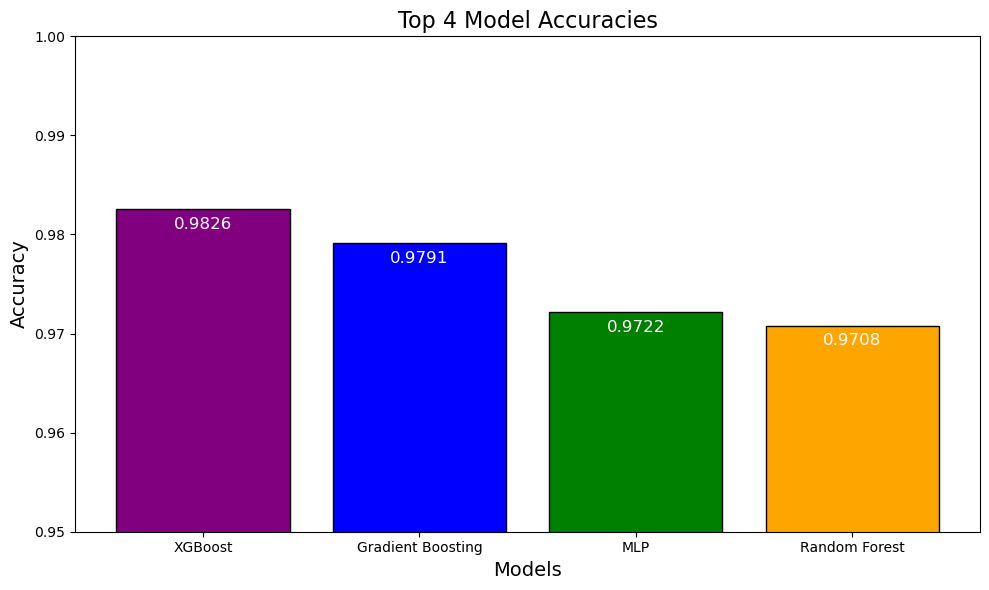

In [86]:
import matplotlib.pyplot as plt

# Best four models and their accuracies
models = ["XGBoost", "Gradient Boosting", "MLP", "Random Forest"]
accuracies = [0.9826, 0.9791, 0.9722, 0.9708]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=["purple", "blue", "green", "orange"], edgecolor="black")

# Adding labels and title
plt.title("Top 4 Model Accuracies", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0.95, 1.0)  # Adjusting y-axis for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc - 0.002, f"{acc:.4f}", ha='center', fontsize=12, color="white")

# Show plot
plt.tight_layout()
plt.show()


In [91]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp39-cp39-win_amd64.whl (7.5 kB)
  Using cached tensorflow_intel-2.18.0-cp39-cp39-win_amd64.whl (390.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached grpcio-1.68.1-cp39-cp39-win_amd64.whl (4.4 MB)
  Using cached h5py-3.12.1-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached ml_dtypes-0.4.1-cp39-cp39-win_amd64.whl (126 kB)
  Using cached rich-13.9.4-py3-none-any.whl (242 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0


In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, LSTM, GRU, Bidirectional, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


ImportError: Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
#SNN
def build_simple_nn(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')  # Adjust for the number of classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#CNN
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#RNN
def build_rnn(input_shape, num_classes):
    model = Sequential([
        SimpleRNN(128, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#LSTM
def build_lstm(input_shape, num_classes):
    model = Sequential([
        LSTM(128, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#GRU
def build_gru(input_shape, num_classes):
    model = Sequential([
        GRU(128, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#Bidirectional-LSTM
def build_bidirectional_lstm(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(128, activation='relu'), input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#CNN+LSTM
def build_cnn_lstm(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Flatten(),
        LSTM(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#Deep-CNN
def build_deep_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#GRU+CNN
def build_gru_cnn(input_shape, num_classes):
    model = Sequential([
        GRU(128, activation='relu', input_shape=input_shape, return_sequences=True),
        Conv2D(32, (3, 3), activation='relu'),
        Flatten(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#Fylly connected dense model
def build_dense_model(input_shape, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# List to store metrics for all models
metrics = []

# Function to train, evaluate, and collect metrics for a model
def train_and_evaluate_model(model_fn, model_name, input_shape, num_classes, X_train, y_train, X_test, y_test):
    # Build the model
    model = model_fn(input_shape, num_classes)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class indices

    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_test, y_pred, multi_class='ovr')  # AUC requires one-hot encoded `y_test`

    # Store metrics
    metrics.append({
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc
    })

    # Optionally return the history for further analysis
    return history


In [ ]:
# Train and evaluate Simple NN
train_and_evaluate_model(build_simple_nn, 'Simple NN', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate CNN
train_and_evaluate_model(build_cnn, 'CNN', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate RNN
train_and_evaluate_model(build_rnn, 'RNN', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate LSTM
train_and_evaluate_model(build_lstm, 'LSTM', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate GRU
train_and_evaluate_model(build_gru, 'GRU', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate Bidirectional LSTM
train_and_evaluate_model(build_bidirectional_lstm, 'Bidirectional LSTM', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate CNN + LSTM Hybrid
train_and_evaluate_model(build_cnn_lstm, 'CNN + LSTM', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate Deep CNN
train_and_evaluate_model(build_deep_cnn, 'Deep CNN', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate GRU + CNN Hybrid
train_and_evaluate_model(build_gru_cnn, 'GRU + CNN', input_shape, num_classes, X_train, y_train, X_test, y_test)

# Train and evaluate Fully Connected Dense Model
train_and_evaluate_model(build_dense_model, 'Fully Connected Dense Model', input_shape, num_classes, X_train, y_train, X_test, y_test)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert metrics list to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot accuracy, precision, recall, F1-score, and AUC for all models
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df.melt(id_vars='model', value_vars=['accuracy', 'precision', 'recall', 'f1_score', 'auc']),
            x='variable', y='value', hue='model')
plt.title('Performance Metrics for Each Model')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Plot Loss Graph
for model, history in histories.items():
    plt.plot(history.history['loss'], label=f'{model} - Training Loss')
    plt.plot(history.history['val_loss'], label=f'{model} - Testing Loss')
plt.title("Training vs Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Bar Graph for Evaluation Metrics
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('model', inplace=True)
metrics_df[['accuracy', 'precision', 'recall', 'f1_score', 'auc']].plot(kind='bar', figsize=(10, 6))
plt.title("Performance Comparison of Models")
plt.ylabel("Scores")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# AUC-ROC Curve
for model, y_pred_prob in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')
plt.title("AUC-ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()


In [ ]:
def plot_training_history(history, model_name):
    """
    Plots training vs validation loss and accuracy for a model's training history.
    """
    epochs = range(1, len(history.history['loss']) + 1)
    
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f'{model_name}: Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title(f'{model_name}: Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


def plot_roc_curves(y_test, y_preds, model_names):
    """
    Plots AUC-ROC curves for all models.
    """
    plt.figure(figsize=(12, 8))
    
    for i, (y_pred, model_name) in enumerate(zip(y_preds, model_names)):
        fpr, tpr, _ = roc_curve(np.argmax(y_test, axis=1), np.max(y_pred, axis=1))
        auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5000)')
    plt.title('AUC-ROC Curves for All Models')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
histories = []  # Store histories of all models
y_preds = []    # Store predictions of all models
model_names = ['Simple NN', 'CNN', 'RNN', 'LSTM', 'GRU', 'Bidirectional LSTM', 
               'CNN + LSTM', 'Deep CNN', 'GRU + CNN', 'Fully Connected Dense Model']

# Example: After training a model
history = train_and_evaluate_model(build_simple_nn, 'Simple NN', input_shape, num_classes, X_train, y_train, X_test, y_test)
histories.append(history)
y_preds.append(model.predict(X_test))  # Save predictions for ROC curve


In [ ]:
for model_name, history in zip(model_names, histories):
    plot_training_history(history, model_name)

# ROC Curve for All Models
plot_roc_curves(y_test, y_preds, model_names)


In [ ]:
# Metrics as DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot Metrics
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df.melt(id_vars='model', value_vars=['accuracy', 'precision', 'recall', 'f1_score', 'auc']),
            x='variable', y='value', hue='model')
plt.title('Comparative Metrics Across Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
